В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из урока 11 «Когортный анализ. Представление результатов» в теме 2 «Установка и настройка базы данных и клиента базы данных».. Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import seaborn as sns

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [45]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [33]:
# напишите запрос
query = '''
SELECT 
    DATE_TRUNC('month', creation_date) AS month_date,
    SUM(views_count) AS total_views
FROM stackoverflow.posts
GROUP BY date_trunc('month', creation_date)
ORDER BY date_trunc('month', creation_date)
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine) 
df

,month_date,total_views
0,2008-07-01,669895
1,2008-08-01,131367083
2,2008-09-01,452928568
3,2008-10-01,365400138
4,2008-11-01,221759651
5,2008-12-01,197792841


<details>

<summary>Подсказка</summary>
Используйте функцию для усечения даты, а затем сгруппируйте и отсортируйте данные.
</details>

Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

<Axes: xlabel='month_date'>

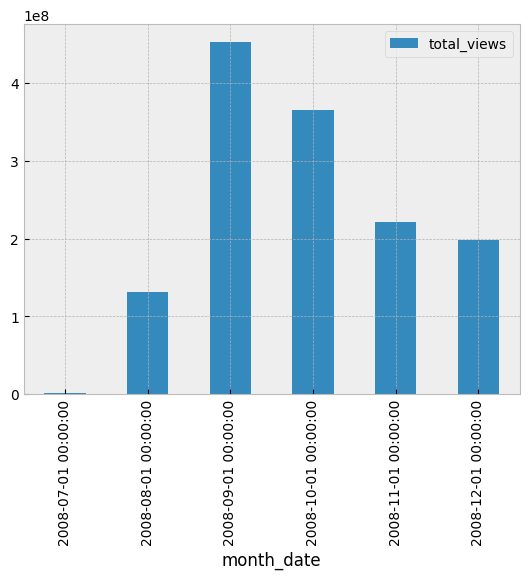

In [40]:
# напишите ваш ответ здесь

df.plot.bar('month_date')

**Колличество просмотров резко увеличивается в сентябре и плавно уменьшается в течении осени. Можно предположить, что из-за начала учебного года, студенты активно начинают искать ответы на свои вопросы. А так же уже работающие программисты возварщаются с летних отпусокв и приступают к работе.**

# Задание 2

In [ ]:
query = '''
SELECT *
FROM stackoverflow.posts
LIMIT 10;
'''
posts_df = pd.read_sql_query(query, con=engine) 
posts_df

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [6]:
query = '''
SELECT *
FROM stackoverflow.posts
LIMIT 10;
'''
posts_df = pd.read_sql_query(query, con=engine) 
posts_df

,id,title,creation_date,favorites_count,last_activity_date,last_edit_date,user_id,parent_id,post_type_id,score,views_count
0,4,Convert Decimal to Double?,2008-07-31 21:42:53,41,2018-07-02 17:55:27.247,2018-07-02 17:55:27,8,0,1,573,37080
1,6,Percentage width child element in absolutely p...,2008-07-31 22:08:09,10,2016-03-19 06:10:52.170,2016-03-19 06:05:48,9,0,1,256,16306
2,7,None,2008-07-31 22:17:58,0,2017-12-16 05:06:57.613,2017-12-16 05:06:58,9,4,2,401,0
3,9,How do I calculate someone's age in C#?,2008-07-31 23:41:00,399,2018-07-25 11:57:14.110,2018-04-21 17:48:14,1,0,1,1743,480476
4,11,Calculate relative time in C#,2008-07-31 23:55:38,529,2018-07-05 04:00:56.633,2017-06-04 15:51:20,1,0,1,1348,136033
5,12,None,2008-07-31 23:56:41,0,2018-01-12 16:10:22.637,2018-01-12 16:10:23,1,11,2,320,0
6,13,Determine a User's Timezone,2008-08-01 00:42:39,137,2018-05-30 15:56:46.080,2018-05-30 15:55:49,9,0,1,539,157009
7,14,Difference between Math.Floor() and Math.Trunc...,2008-08-01 00:59:11,53,2018-07-17 07:14:23.037,2017-02-25 17:42:18,11,0,1,373,108769
8,16,Filling a DataSet or DataTable from a LINQ que...,2008-08-01 04:59:34,13,2018-04-11 11:55:31.637,2016-11-30 08:01:28,2,0,1,114,79087
9,17,Binary Data in MySQL,2008-08-01 05:09:56,19,2018-01-20 09:06:34.963,2011-10-21 21:29:17,2,0,1,169,65443


| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [43]:
query = '''
SELECT creation_date + INTERVAL '1 month - 1 day'
FROM stackoverflow.users
'''

pd.read_sql_query(query, con=engine)

,?column?
0,2008-08-31 14:22:31
1,2008-08-31 14:22:31
2,2008-08-31 14:22:31
3,2008-08-31 14:22:31
4,2008-08-31 14:22:31
...,...
24039,2010-10-29 15:11:05
24040,2011-01-05 21:35:17
24041,2010-10-30 18:25:47
24042,2010-03-20 08:09:57


<details>

<summary>Подсказка</summary>
Вам нужно присоединить несколько таблиц — изучите внимательнее описание базы. Чтобы добавить промежуток времени к дате, используйте ключевое слово INTERVAL, например, так: <дата> + INTERVAL '1 year 2 months 3 days'
.</details>

Какие аномалии наблюдаются в данных? О чём они говорят?

In [ ]:
# напишите ваш ответ здесь

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [76]:
query = '''
SELECT DATE_TRUNC('month', creation_date) AS month,
       count(id) AS count
FROM stackoverflow.posts
WHERE user_id IN (SELECT user_id
                  FROM stackoverflow.posts
                  WHERE EXTRACT(MONTH FROM creation_date) = '12')
      AND user_id IN (SELECT id AS user_id
                      FROM stackoverflow.users
                      WHERE EXTRACT(MONTH FROM creation_date) = '9')
GROUP BY month
ORDER BY month DESC
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые зарегистрировались в сентябре 2008 года и оставили хотя бы один пост в декабре. Затем используйте результат для среза и посчитайте посты по месяцам.</details>

Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

<Axes: xlabel='month'>

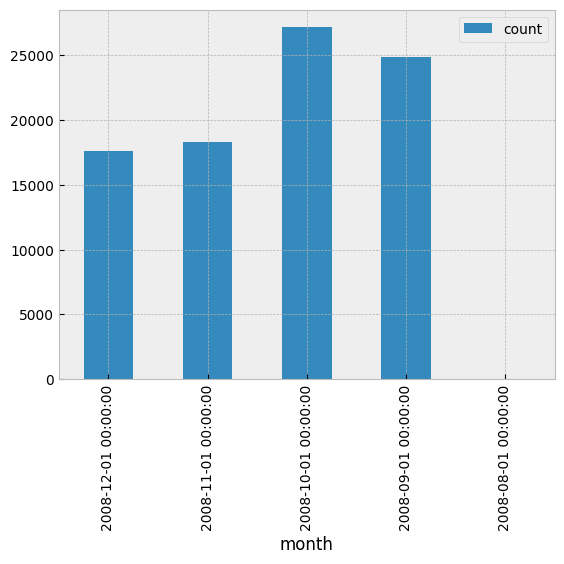

In [78]:
df.plot.bar('month')

**Из граффика мы видим, что в октябре, следующем после регистрации месяце, был пик постов от новых пользователей. Затем, в ноябре и декабре идет спад.**

**Предположу, что новые пользователи регистрировались, чтобы задать уде имеющиеся вопросы. А затем, по мере решения этих вопросов, их активность снижалась.**

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [88]:
query = '''
SELECT user_id,
    creation_date,
    views_count,
    SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY user_id 
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509


<details>

<summary>Подсказка</summary>
Для подсчёта суммы с накоплением используйте оконную функцию.
</details>

# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [191]:
query = '''
SELECT DISTINCT
    user_id,
    DATE_TRUNC('day', creation_date),
    COUNT(*) OVER (PARTITION BY DATE_TRUNC('day', creation_date))
FROM stackoverflow.posts
ORDER BY user_id 
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,user_id,date_trunc,count
0,1,2008-07-31,6
1,1,2008-08-04,301
2,1,2008-08-10,181
3,1,2008-08-11,433
4,1,2008-08-12,544


In [189]:
query = '''
SELECT DISTINCT
    user_id,
    DATE_TRUNC('day', creation_date) AS creation_date,
    COUNT(*) OVER (PARTITION BY DATE_TRUNC('day', creation_date)) AS daily
FROM stackoverflow.posts
WHERE user_id IN (SELECT user_id
                        FROM stackoverflow.posts
                        WHERE EXTRACT(MONTH FROM creation_date) = '8'
                        GROUP BY user_id
                        HAVING COUNT(id) > 120)
ORDER BY user_id 
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,user_id,creation_date,daily
0,91,2008-08-01,8
1,91,2008-08-02,7
2,91,2008-08-03,17
3,91,2008-08-04,29
4,91,2008-08-05,58


In [203]:
query = '''
WITH t1 AS (SELECT DISTINCT
    user_id,
    DATE_TRUNC('day', creation_date) AS creation_date,
    COUNT(*) OVER (PARTITION BY DATE_TRUNC('day', creation_date)) AS daily
    FROM stackoverflow.posts
    WHERE user_id IN (SELECT user_id
                        FROM stackoverflow.posts
                        WHERE EXTRACT(MONTH FROM creation_date) = '8'
                        GROUP BY user_id
                        HAVING COUNT(id) > 120))

SELECT DISTINCT 
    user_id,
    AVG(daily) OVER (ORDER BY creation_date) AS avg_daily
FROM t1
ORDER BY avg_daily
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,user_id,avg_daily
0,91,7.333333
1,116,7.333333
2,91,8.000000
3,234,12.166667
4,116,12.166667


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [224]:
query = '''
WITH t1 AS (
SELECT user_id,
    COUNT(DISTINCT DATE_TRUNC('day', creation_date))
FROM stackoverflow.posts
WHERE creation_date BETWEEN '2008-12-01' AND '2008-12-08'
GROUP BY user_id
ORDER BY user_id
)

SELECT AVG(count)
FROM t1
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,avg
0,1.772438


<details>

<summary>Подсказка</summary>
Посчитайте, сколько активных дней было у каждого пользователя. Добавьте данные во временную таблицу и используйте в основном запросе.
</details>

Проанализируйте итоговую таблицу — какие выводы можно сделать?

**Почти 2 дня в среднем каждый пользователь взаимодействовал с платформой**

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [262]:
query = '''
WITH t1 AS (
SELECT user_id,
    creation_date,
    LAG(creation_date, 2) OVER (PARTITION BY user_id ORDER BY creation_date) AS second_last_month 
FROM stackoverflow.posts
ORDER BY user_id, creation_date
)

SELECT user_id,
    creation_date,
    TO_CHAR(second_last_month, 'Month') AS second_last_month 

   
FROM t1


'''
df = pd.read_sql_query(query, con=engine)
df.head(6)

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
5,1,2008-08-04 08:04:42,August


<details>

<summary>Подсказка</summary>
Преобразовать результат оконной функции в нужное значение вам поможет аналог условного оператора в SQL: CASE <поле> WHEN <старое значение> THEN <новое значение> END.
</details>

# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [288]:
query = '''
WITH profile AS (
    SELECT user_id,
        MIN(DATE_TRUNC('month', creation_date)) AS cohort_dt,
        COUNT(*) OVER (PARTITION BY MIN(DATE_TRUNC('month', creation_date))) AS cohort_users_cnt
    FROM stackoverflow.posts
    GROUP BY user_id
    ORDER BY user_id
),

sessions AS (
    SELECT user_id,
        DATE_TRUNC('month', creation_date) AS session_date
    FROM stackoverflow.posts
    GROUP BY user_id, creation_date
)

SELECT p.cohort_dt,
       session_date,
       COUNT(DISTINCT p.user_id) AS users_cnt,
       cohort_users_cnt,
       ROUND(COUNT(DISTINCT p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4
ORDER BY cohort_dt,
    session_date
'''

df = pd.read_sql_query(query, con=engine)
df.head()

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33


<details>

<summary>Подсказка</summary>
Вспомните, как выглядел запрос для расчёта Retention Rate в теории. Создайте две временные таблицы: `profile` и `sessions` (в ней будет информация о публикациях), а затем используйте их в основном запросе.

Во временной таблице `profile` вам понадобятся три поля:

- идентификатор пользователя;
- дата первого поста пользователя, усечённая до месяца (признак начала когорты);
- количество пользователей этой когорты.
</details>

Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

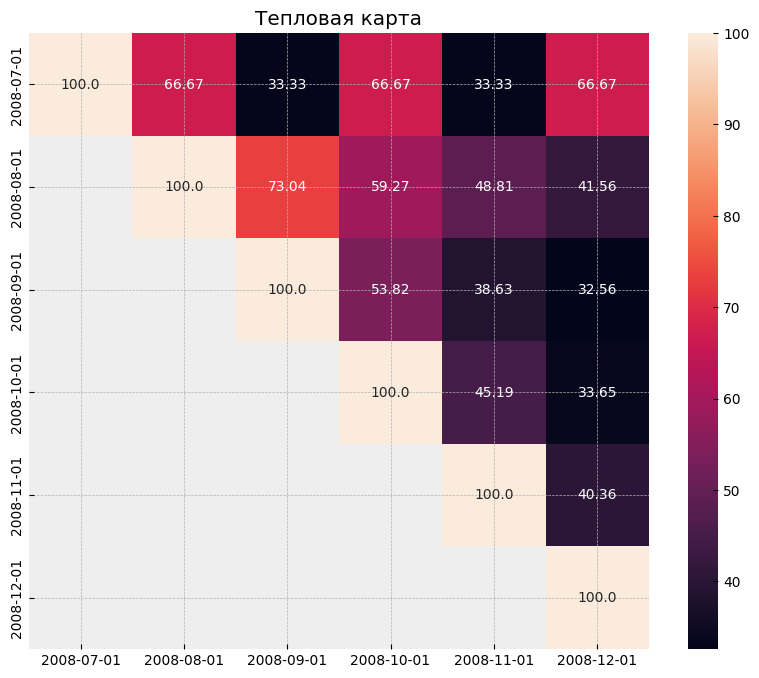

In [295]:
# создаём сводную таблицу с результатами
retention = df.pivot(index='cohort_dt', columns='session_date', values='retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(10, 8)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта') # название графика
plt.show() 

**Когорта от августа имеет самое большое удержание пользователей. Когорта ноября – самое маленькое. 
Анамалий не видно.**

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [354]:
query = '''
WITH t1 AS (
    SELECT EXTRACT(MONTH FROM creation_date) AS creation_month,
        COUNT(*) AS posts_count
    FROM stackoverflow.posts
    GROUP BY creation_month
)
SELECT creation_month,
    posts_count,
    - 100.0 * (1 - posts_count / LAG(posts_count::numeric) OVER ()) AS percentage 
FROM t1
WHERE creation_month BETWEEN 9 AND 12
ORDER BY creation_month
'''
df = pd.read_sql_query(query, con=engine)
df.head(6)

,creation_month,posts_count,percentage
0,9.0,70371,NaN
1,10.0,63102,-10.329539
2,11.0,46975,-25.557035
3,12.0,44592,-5.072911


<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

Постройте круговую диаграмму с количеством постов по месяцам.

<Axes: ylabel='posts_count'>

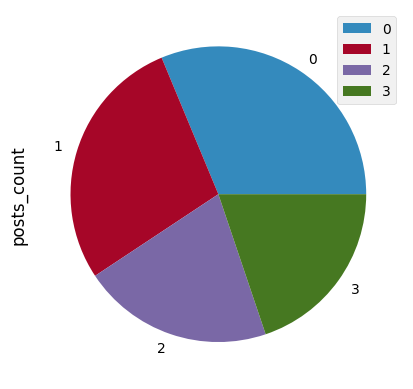

In [358]:
# постройте круговую диаграмму с количеством постов по месяцам

df.plot(y='posts_count',kind='pie')

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [385]:
query = '''
SELECT user_id,
    COUNT(*)
FROM stackoverflow.posts
GROUP BY user_id
ORDER BY count DESC
LIMIT 1
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,user_id,count
0,22656,1174


In [388]:
query = '''
SELECT DATE_PART('week', creation_date) AS week_creation,
    MAX(creation_date) OVER (PARTITION BY DATE_PART('week', creation_date) ORDER BY) AS creation_date
FROM stackoverflow.posts
WHERE user_id = '22656' and DATE_PART('month', creation_date) = '10'
GROUP BY creation_date
ORDER BY week_creation 
'''
df = pd.read_sql_query(query, con=engine)
df.head()

ProgrammingError: (psycopg2.errors.SyntaxError) syntax error at or near ")"
LINE 4: ...ITION BY DATE_PART('week', creation_date) ORDER BY) AS creat...
                                                             ^

[SQL: 
SELECT DISTINCT
    DATE_PART('week', creation_date) AS week_creation,
    MAX(creation_date) OVER (PARTITION BY DATE_PART('week', creation_date) ORDER BY) AS creation_date
FROM stackoverflow.posts
WHERE user_id = '22656' and DATE_PART('month', creation_date) = '10'
ORDER BY week_creation 
]
(Background on this error at: https://sqlalche.me/e/20/f405)

<details>

<summary>Подсказка</summary>
Декомпозируйте задачу:
1) Найдите пользователя, который опубликовал больше всего постов. 2) Найдите дату и время создания каждого поста этого пользователя и номер недели. 
3) Отобразите данные только о последних постах пользователя. Для этого можно использовать оконную функцию.
</details>